In [199]:
import os
import pandas as pd
import numpy as np
import random

In [467]:
import matplotlib.pyplot as plt
from random import sample

In [201]:
files = [i for i in os.listdir("individual_book_train") if ".csv" in i]

In [202]:
tids = []
for file in files[:]:
    df = pd.read_csv(f"individual_book_train/{file}")
    tid = df["time_id"].unique()
    tids.append(tid)


In [203]:
ltids = [len(i) for i in tids]
unique, counts = np.unique(ltids, return_counts=True)
print(np.asarray((unique, counts)).T)


[[3815    1]
 [3820    1]
 [3829    3]
 [3830  107]]


In [113]:
smeans = []
sstds = []
for file in files[:]:
    print(len(smeans))
    df = pd.read_csv(f"individual_book_train/{file}")
    df['wap'] = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1'])/(df['bid_size1'] + df['ask_size1'])
    tid = df["time_id"].unique()
    volatilities = []
    stds = []
    means = []
    
    for t in tid:
        dt = df[df['time_id'] == t]
        returns = np.log(dt['wap'][1:].to_numpy()/dt['wap'][:-1].to_numpy())
        # returns = list(returns)
        # print(len(returns))
        returns = np.append(returns,[0]*(600-len(returns)))
        # returns.extend()
        # print(len(returns))
        # returns = np.array(returns)
        volatilities.append(np.sqrt(np.sum(returns**2)))
        stds.append(returns.std())
        means.append(returns.mean())
    smeans.append(np.mean(means))
    sstds.append(np.mean(stds))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


In [114]:
final_df = pd.DataFrame({"mean": smeans,"std":sstds},index=files)
final_df.head()
# final_df.to_csv("chrono.csv")


In [208]:
def gettid(x):
    final_prices = {}
    for file in files[:5]:
        df = pd.read_csv(f"individual_book_train/{file}")
        df['wap'] = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1'])/(df['bid_size1'] + df['ask_size1'])
        dt = df[df["time_id"] == x]
        dt.index = dt['seconds_in_bucket']
        dt = dt['wap'].to_dict()
        prices = []
        # last = dt.values()[0]
        last = dt[0]
        for i in range(600):
            if(not i in dt.keys()):
                prices.append(last)
            else:
                prices.append(dt[i])
        final_prices[file] = prices


    fdf = pd.DataFrame(final_prices)
    indx = random.randint(0,598)
    t = fdf.iloc[indx : indx+2].to_numpy()
    first = fdf.iloc[0].to_numpy() 
    last = fdf.iloc[-1].to_numpy() 
    return first,last,t
first,last,tru = gettid(1000)

In [205]:
ltids = np.array(ltids)
tids = tids[np.where(ltids == max(ltids))[0][0]]

In [209]:
last_ind = 1

firsts = []
lasts = []
trues = []
for i in tids[:last_ind]:
    first,last,tru = gettid(i)
    firsts.append(first)
    lasts.append(last)
    trues.append(tru)
data = pd.DataFrame({"first": firsts,"last": lasts},index=tids[:last_ind])
trues = np.array(trues)
data.head()
print(trues.shape)

(1, 2, 5)


In [234]:
wdf = None
wdf = []
for file in files[:]:
    print(len(wdf))
    df = pd.read_csv(f"individual_book_train/{file}")
    df['wap'] = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1'])/(df['bid_size1'] + df['ask_size1'])
    df = df[['wap',"seconds_in_bucket","time_id"]]
    index = pd.MultiIndex.from_arrays([df['seconds_in_bucket'],df['time_id']])
    df = df['wap']
    df.index = index
    df.name = file
    wdf.append(df)
    # if type(wdf) == type(None):
    #     wdf = df
    # else:
    #     wdf = pd.concat([wdf,df],axis= 1)
    # print(wdf.shape)
    # print(wdf.head())
    # print(type(wdf))
    # print(index)
print("Concatenating")
wdf = pd.concat(wdf,axis= 1)
print("Saving")
print(wdf.shape)
wdf.to_csv("all_wap.csv")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
Concatenating
Saving
(2298000, 112)


In [250]:
index = pd.MultiIndex.from_tuples([(i[1],i[0]) for i in list(wdf.index)])
wdf.index = index

In [426]:
print(wdf.shape)
print(3830*600)

(2298000, 114)
2298000


In [431]:
# wdf = pd.read_csv("all_wap.csv",index_col=['time_id','seconds_in_bucket'])
wdf = pd.read_csv("all_wap.csv")

In [432]:
df = wdf.copy(deep=True)

In [433]:
wdf.head()

,seconds_in_bucket,time_id,stock_13.csv,stock_10.csv,stock_38.csv,stock_39.csv,stock_11.csv,stock_29.csv,stock_15.csv,stock_14.csv,...,stock_18.csv,stock_30.csv,stock_20.csv,stock_34.csv,stock_35.csv,stock_21.csv,stock_37.csv,stock_23.csv,stock_22.csv,stock_36.csv
0,0,5,1.000213,1.000127,1.001546,1.000408,1.001512,1.001905,0.999522,1.000666,...,1.001181,1.001724,0.999454,0.999254,1.000995,1.001424,1.002716,1.001483,1.000388,1.002266
1,1,5,1.000267,1.000000,1.001084,1.000195,1.002568,1.002141,1.000139,1.000915,...,NaN,NaN,0.999091,0.999229,1.000996,1.001424,NaN,1.001452,1.000643,1.002125
2,2,5,1.000256,1.000172,1.001569,1.000293,1.001020,1.002171,0.999797,1.000916,...,1.001181,NaN,0.999091,0.999254,1.000998,1.001529,1.002483,1.001146,1.000606,1.002267
3,3,5,1.000256,0.999778,1.001225,1.000251,1.001021,1.002130,1.000161,1.000781,...,1.001073,NaN,0.999040,0.999229,1.000963,1.001430,NaN,1.001096,1.000523,1.002267
4,4,5,1.000256,0.999978,1.001647,1.000129,NaN,1.002022,0.999858,1.000899,...,1.001072,1.001742,NaN,0.999229,1.000984,1.001509,NaN,1.000815,1.000655,1.002344


In [370]:
wdf[wdf["time_id"] == 5] =  wdf[wdf["time_id"] == 5].fillna(method="ffill")

In [434]:
for i in tids:
    # print(i)
    wdf[wdf["time_id"] == i] =  wdf[wdf["time_id"] == i].fillna(method="ffill")
    

In [435]:
d = {}
for i in tids:
    d[i] = wdf[wdf['time_id'] == i].isna().sum().sum()

In [436]:
[(k,d[k]) for k in sorted(d,key=lambda k: -d[k])]

[(2458, 600),
 (3138, 600),
 (5285, 600),
 (6172, 600),
 (6696, 600),
 (6925, 600),
 (7564, 600),
 (8353, 600),
 (9445, 600),
 (9960, 600),
 (10017, 600),
 (10765, 600),
 (12423, 600),
 (13735, 600),
 (14995, 600),
 (16774, 600),
 (17727, 600),
 (18491, 600),
 (19136, 600),
 (21431, 600),
 (22188, 600),
 (22455, 600),
 (23873, 600),
 (24161, 600),
 (27795, 600),
 (28395, 600),
 (29802, 600),
 (32186, 600),
 (5, 0),
 (11, 0),
 (16, 0),
 (31, 0),
 (62, 0),
 (72, 0),
 (97, 0),
 (103, 0),
 (109, 0),
 (123, 0),
 (128, 0),
 (146, 0),
 (147, 0),
 (152, 0),
 (157, 0),
 (159, 0),
 (169, 0),
 (207, 0),
 (211, 0),
 (213, 0),
 (218, 0),
 (227, 0),
 (229, 0),
 (232, 0),
 (250, 0),
 (254, 0),
 (256, 0),
 (266, 0),
 (273, 0),
 (289, 0),
 (297, 0),
 (303, 0),
 (309, 0),
 (310, 0),
 (317, 0),
 (319, 0),
 (325, 0),
 (326, 0),
 (335, 0),
 (337, 0),
 (358, 0),
 (371, 0),
 (373, 0),
 (380, 0),
 (381, 0),
 (411, 0),
 (420, 0),
 (424, 0),
 (427, 0),
 (436, 0),
 (438, 0),
 (454, 0),
 (465, 0),
 (468, 0),
 (48

In [439]:
wdf[wdf["time_id"] == 2458]

,seconds_in_bucket,time_id,stock_13.csv,stock_10.csv,stock_38.csv,stock_39.csv,stock_11.csv,stock_29.csv,stock_15.csv,stock_14.csv,...,stock_18.csv,stock_30.csv,stock_20.csv,stock_34.csv,stock_35.csv,stock_21.csv,stock_37.csv,stock_23.csv,stock_22.csv,stock_36.csv
142749,0,2458,0.998019,1.003853,NaN,0.998293,1.006431,0.995753,1.003341,0.995237,...,1.002565,1.005295,0.997648,0.998862,1.000854,1.001207,0.990745,1.004828,0.999703,0.994017
142750,1,2458,0.997609,1.004008,NaN,0.998121,1.006431,0.995603,1.003341,0.994383,...,1.002565,1.005295,0.998347,0.998968,1.001299,1.001207,0.990745,1.004828,0.998744,0.993630
142751,3,2458,0.997387,1.004143,NaN,0.998667,1.007582,0.995403,1.003603,0.994373,...,1.002565,1.005295,0.997648,0.998992,1.001963,1.001207,0.990745,1.004828,0.997572,0.994712
142752,5,2458,0.997418,1.004220,NaN,0.998667,1.007657,0.995617,1.003604,0.994247,...,1.002565,1.005295,0.997648,0.998992,1.002205,1.000984,0.990745,1.004828,0.998125,0.995737
142753,9,2458,0.997396,1.003686,NaN,0.998034,1.008098,0.995602,1.004411,0.994294,...,1.002565,1.005295,0.997648,0.998992,1.002733,1.001864,0.990745,1.004828,0.997928,0.995737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828857,511,2458,1.002890,0.997814,NaN,1.001246,1.001299,0.990372,1.005286,0.993438,...,0.992907,0.998800,0.996868,0.997773,1.009032,1.003090,1.009831,0.997236,0.991484,0.989944
1828858,530,2458,1.002890,0.998183,NaN,1.000855,0.999803,0.989671,1.004981,0.993495,...,0.983021,0.999756,0.997362,0.998135,1.008899,1.002438,1.009831,0.996765,0.991575,0.990630
1828859,546,2458,1.002890,0.998901,NaN,1.001927,0.999803,0.989854,1.005985,0.993051,...,0.983021,0.999756,0.998559,0.997579,1.008577,1.002786,1.009831,0.996765,0.990814,0.990630
1828860,553,2458,1.002890,0.998794,NaN,1.002445,0.999803,0.990184,1.006071,0.993164,...,0.983021,0.998685,0.998491,0.997105,1.008035,1.003056,1.011217,0.996765,0.990814,0.990699


In [440]:
# tid = tids[np.random.randint(0,len(tids))]
# s = wdf[wdf['time_id'] == 5].sort_index()
# second = np.random.randint(0,599)
zeros = wdf[wdf['seconds_in_bucket'] == 0]
print(wdf.isna().sum().sum())
print(df.isna().sum().sum())

print(zeros.isna().sum().sum())

16800
90122711
28


In [441]:
wdf.to_csv("all_wap.csv")

In [547]:
rets = []
for i in tids:
    r = np.random.randint(0,599)
    f = wdf[np.bitwise_and(wdf['time_id'] == i,wdf['seconds_in_bucket'] == r)].to_numpy()[0][2:]
    l = wdf[np.bitwise_and(wdf['time_id'] == i,wdf['seconds_in_bucket'] == r+1)].to_numpy()[0][2:]
    ret = (l-f)/f
    ret = ret**2
    ret = ret.mean()
    rets.append(ret)


In [548]:
frets = []
for _ in tids:
    r = np.random.randint(0,599,size = 2)
    times = sample(list(tids),2)
    f = wdf[np.bitwise_and(wdf['time_id'] == times[0],wdf['seconds_in_bucket'] == r[0])].to_numpy()[0][2:]
    l = wdf[np.bitwise_and(wdf['time_id'] == times[1],wdf['seconds_in_bucket'] == r[1])].to_numpy()[0][2:]
    ret = (l-f)/f
    ret = ret**2
    ret = ret.mean()
    frets.append(ret)





In [549]:
rets = np.array(rets)
frets = np.array(frets)

rets = rets[np.bitwise_not( np.isnan(rets) )]
frets = frets[np.bitwise_not( np.isnan(frets) )]

# np.isnan(frets)
print(f"True returns mean {rets.mean()} and std {rets.std()}")
print(f"False returns mean {frets.mean()} and std {frets.std()}")

True returns mean 1.488802338932605e-07 and std 7.720154259523848e-07
False returns mean 2.604752250952886e-05 and std 4.17100861984976e-05


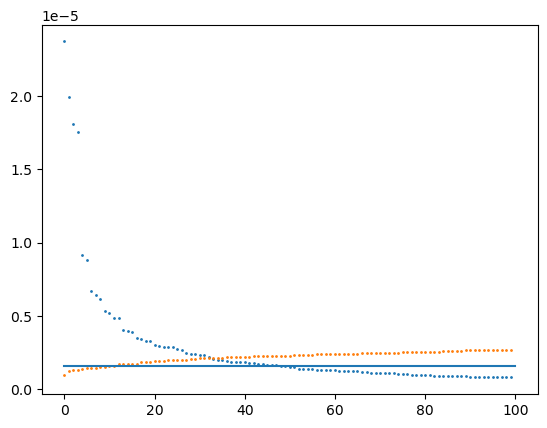

In [550]:
_  = plt.scatter(range(100),sorted(rets,reverse= True)[:100],s = 1)
_  = plt.scatter(range(100),sorted(frets,reverse=False)[:100],s = 1)
thresh = 1.6e-6
_  = plt.plot([0,100],[thresh,thresh]) 

In [551]:
def accuracy(t,f,thresh):
    correct = (t<thresh).sum() + (f>thresh).sum()
    return correct/(len(t)+len(f))
accuracy(rets,frets,thresh)

0.9923361522198731

In [552]:
accs = {}
for i in range(100):
    accs[i] = accuracy(rets,frets,i*1e-7)

In [553]:
[(k,accs[k]) for k in accs if accs[k] == max(accs.values())]

[(14, 0.992468287526427), (17, 0.992468287526427)]

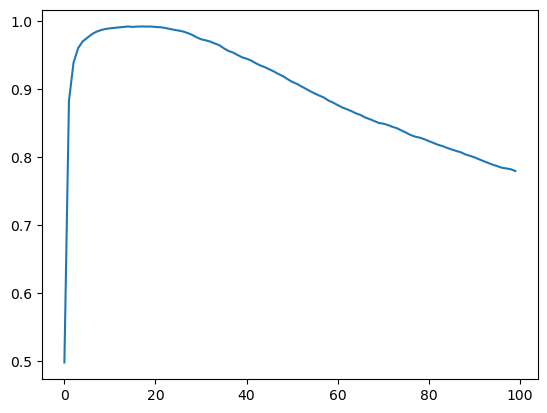

In [554]:
plt.plot(accs.keys(),accs.values())

In [555]:
final_df

,mean,std
stock_13.csv,2.085506e-08,0.000111
stock_10.csv,1.229912e-08,0.000155
stock_38.csv,1.208933e-07,0.000204
stock_39.csv,4.591977e-09,0.000119
stock_11.csv,-1.191257e-07,0.000208
...,...,...
stock_21.csv,1.988952e-08,0.000111
stock_37.csv,-4.539832e-08,0.000292
stock_23.csv,-1.079420e-08,0.000194
stock_22.csv,-1.572702e-07,0.000212


In [556]:
rets = []
for i in tids:
    r = np.random.randint(0,599)
    f = wdf[np.bitwise_and(wdf['time_id'] == i,wdf['seconds_in_bucket'] == r)].to_numpy()[0][2:]
    l = wdf[np.bitwise_and(wdf['time_id'] == i,wdf['seconds_in_bucket'] == r+1)].to_numpy()[0][2:]
    ret = (l-f)/f
    ret -= final_df['mean']
    ret /= final_df["std"]
    ret = ret**2
    ret = ret.mean()
    rets.append(ret)

In [557]:
frets = []
for _ in tids:
    r = np.random.randint(0,599,size = 2)
    times = sample(list(tids),2)
    f = wdf[np.bitwise_and(wdf['time_id'] == times[0],wdf['seconds_in_bucket'] == r[0])].to_numpy()[0][2:]
    l = wdf[np.bitwise_and(wdf['time_id'] == times[1],wdf['seconds_in_bucket'] == r[1])].to_numpy()[0][2:]
    ret = (l-f)/f
    ret -= final_df['mean']
    ret /= final_df["std"]
    ret = ret**2
    ret = ret.mean()
    frets.append(ret)



In [558]:
rets = np.array(rets)
frets = np.array(frets)

rets = rets[np.bitwise_not( np.isnan(rets) )]
frets = frets[np.bitwise_not( np.isnan(frets) )]

# np.isnan(frets)
print(f"True returns mean {rets.mean()} and std {rets.std()}")
print(f"False returns mean {frets.mean()} and std {frets.std()}")

True returns mean 4.341576911758768 and std 17.51949051345694
False returns mean 1040.4318578909772 and std 1969.509783666522


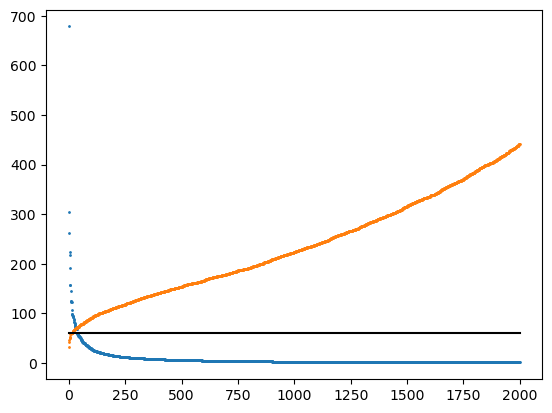

In [625]:
limit = 2000
_  = plt.scatter(range(limit),sorted(rets,reverse= True)[:limit],s = 1)
_  = plt.scatter(range(limit),sorted(frets,reverse=False)[:limit],s = 1)
thresh = 60
_  = plt.plot([0,limit],[thresh,thresh],c = 'k') 

In [560]:
accs = {}
for i in range(100):
    accs[i] = accuracy(rets,frets,i)

In [561]:
[(k,accs[k]) for k in accs if accs[k] == max(accs.values())]

[(59, 0.993733681462141), (60, 0.993733681462141)]

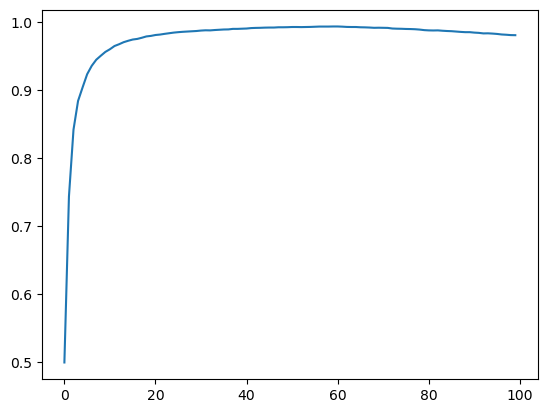

In [562]:
plt.plot(accs.keys(),accs.values())

In [576]:
starts = []
ends = []
for i in tids:
    start = wdf[np.bitwise_and(wdf['time_id'] == i , wdf['seconds_in_bucket'] == 0)].to_numpy()[0][2:]
    end = wdf[np.bitwise_and(wdf['time_id'] == i , wdf['seconds_in_bucket'] == 599)].to_numpy()[0][2:]

    starts.append(start)
    ends.append(end)

In [597]:
data = {}
for s,start in enumerate(starts):
    if (s%100 == 0):
        print(s/len(starts))
    for e,end in enumerate(ends):
        ret = (end-start)/start
        ret -= final_df['mean']
        ret /= final_df["std"]
        ret = ret**2
        ret = ret.mean()
        data[(tids[s],tids[e])] = ret



0.0
0.02610966057441253
0.05221932114882506
0.0783289817232376
0.10443864229765012
0.13054830287206268
0.1566579634464752
0.18276762402088773
0.20887728459530025
0.2349869451697128
0.26109660574412535
0.28720626631853785
0.3133159268929504
0.3394255874673629
0.36553524804177545
0.391644908616188
0.4177545691906005
0.44386422976501305
0.4699738903394256
0.4960835509138381
0.5221932114882507
0.5483028720626631
0.5744125326370757
0.6005221932114883
0.6266318537859008
0.6527415143603134
0.6788511749347258
0.7049608355091384
0.7310704960835509
0.7571801566579635
0.783289817232376
0.8093994778067886
0.835509138381201
0.8616187989556136
0.8877284595300261
0.9138381201044387
0.9399477806788512
0.9660574412532638
0.9921671018276762


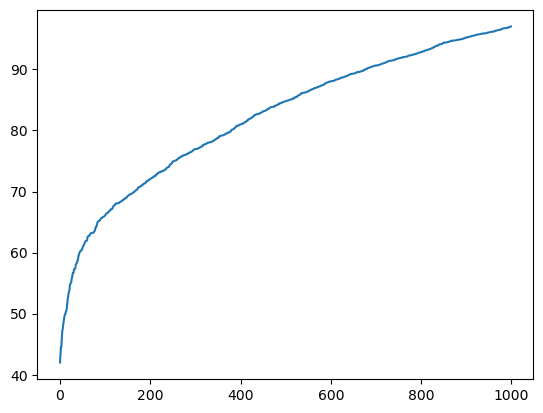

In [589]:
plt.plot(sorted(data.values())[:1000])

In [598]:
[(k,data[k]) for k in sorted(data,key=lambda k: data[k])]

[((14769, 14769), 19.374904945257327),
 ((28993, 28993), 21.1857486638387),
 ((11886, 11886), 21.665289396834545),
 ((20453, 20453), 25.92861460711912),
 ((20351, 20351), 26.379539664241783),
 ((17387, 2891), 26.740006589349093),
 ((10682, 10682), 27.44359176967885),
 ((25015, 25015), 27.721826149789887),
 ((27403, 14769), 28.465155571934986),
 ((454, 454), 28.53880727229881),
 ((13276, 14769), 28.5825303414668),
 ((3046, 3046), 28.740228086093516),
 ((10985, 10985), 28.747611459900003),
 ((19495, 19495), 29.09299406925921),
 ((12011, 14769), 29.883988339649914),
 ((15846, 15846), 29.893103050141256),
 ((27071, 14769), 30.006974468949785),
 ((10220, 10220), 30.09107732878859),
 ((18949, 20351), 30.094495723705474),
 ((15846, 20351), 30.456235643487304),
 ((29494, 20351), 30.475906216220356),
 ((31214, 11886), 30.501060574675304),
 ((13762, 11886), 30.530841713373416),
 ((31719, 31719), 30.533323113349212),
 ((411, 10985), 30.614195334074896),
 ((4031, 14769), 30.674456685839772),
 ((41

In [600]:
df = pd.DataFrame({"start": [i[0] for i in data.keys()],"end": [i[1] for i in data.keys()],"distance": data.values()})

In [605]:
df.head()

,start,end,distance
6811518,14769,14769,19.374905
13117344,28993,28993,21.185749
5394048,11886,11886,21.665289
9474063,20453,20453,25.928615
9420429,20351,20351,26.379540


In [604]:
df = df.sort_values("distance")

In [608]:
df.to_csv("distances.csv")

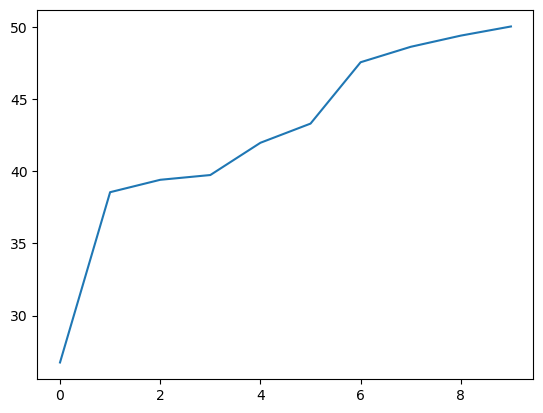

In [617]:
i = 17387
att = df[df['start'] == i]
# att = att.sort_values("distance")

plt.plot(range(len(tids))[:10],att['distance'][:10])

In [616]:
df[np.bitwise_and(df['distance']< 50,df['start']-df['end'] != 0)]

,start,end,distance
8039525,17387,2891,26.740007
12499068,27403,14769,28.465156
6049348,13276,14769,28.582530
5467188,12011,14769,29.883988
12357358,27071,14769,30.006974
...,...,...,...
3066760,6566,23034,49.995209
2676902,5749,30334,49.995457
11683759,25616,18628,49.996796
1824179,3987,9207,49.998130


In [662]:
tdf = df[df['start']-df['end'] != 0]
chain = {}
for i in tids:
    ttdf = tdf[tdf['end'] == i].iloc[0]
    chain[i] = (ttdf['start'],ttdf['distance'])
    # print(tdf.head())
    # print(tdf['start'])
    # break

In [675]:
chainl = {}
for i in tids:
    last = i
    sequence = []
    distances = []
    while (last not in sequence):
        sequence.append(last)
        last = chain[last][0]
        distances.append(chain[last][1])
    chainl[i] = (len(sequence),np.mean(distances))

In [684]:
[(k,chainl[k]) for k in sorted(chainl,key=lambda x:-chainl[x][0])][:10]

[(4294, (56, 121.54115249734598)),
 (12139, (55, 110.07354474863637)),
 (12760, (55, 140.5242016979485)),
 (18822, (55, 140.5242016979485)),
 (22548, (55, 107.75267160280178)),
 (26336, (55, 105.95656533894807)),
 (29448, (55, 140.5242016979485)),
 (1350, (54, 141.25293186230607)),
 (3123, (54, 106.39329036126755)),
 (6481, (54, 142.17819945208498))]

In [685]:
[(k,chainl[k]) for k in sorted(chainl,key=lambda x:chainl[x][1])][:10]

[(1938, (3, 33.55548033838796)),
 (30729, (3, 33.55548033838796)),
 (14769, (2, 36.10064272161444)),
 (27403, (2, 36.10064272161444)),
 (20715, (3, 38.645805104840925)),
 (31054, (3, 38.645805104840925)),
 (19033, (4, 48.54277086089233)),
 (13971, (44, 96.06565022709097)),
 (26021, (10, 96.31902674845051)),
 (4310, (43, 96.74670273113644))]